In [380]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from sklearn import preprocessing 

# Steam game performance playtime, twitch 365,  user network reviews, and directory

## Steam performance playtime data

In [3]:
steam_un_g = pd.read_csv(r"C:\Users\wesdu\GA_DAB_812_python\Capstone\User_Networks\user_networks_game_performance.csv")

In [45]:
# Clean the 'name' column by removing special characters
steam_un_g['name'] = steam_un_g['name'].str.replace(r'[©™®]', '', regex=True)

# Optionally, you can also strip any leading or trailing whitespace
steam_un_g['name'] = steam_un_g['name'].str.strip()

In [5]:
steam_un_g

,Unnamed: 0,name,app_id,playtime_forever,playtime_2weeks,number_of_owners,owners_played,owners_not_played,players_2w,owners_played_%,players_2w_to_owners_played_%,players_2w_to_owners_%
0,6046,Counter-Strike 2,730,3537357097,9857187.0,47408,41689,6026,10308,87.936635,24.725947,21.743166
1,11666,Garry's Mod,4000,679239081,595447.0,29842,26362,3647,719,88.338583,2.727411,2.409356
2,23925,Rocket League,252950,376248137,807544.0,18379,16309,2168,1657,88.737146,10.160034,9.015724
3,7686,Destiny 2,1085660,313101373,1302093.0,23920,16352,7688,931,68.361204,5.693493,3.892140
4,20976,PUBG: BATTLEGROUNDS,578080,312740636,603987.0,30049,25100,5130,1063,83.530234,4.235060,3.537555
...,...,...,...,...,...,...,...,...,...,...,...,...
35491,3874,Boppio,1384030,0,0.0,2,0,2,0,0.000000,0.000000,0.000000
35492,9671,European Mystery: Scent of Desire Collector’s ...,580480,0,0.0,1,0,1,0,0.000000,0.000000,0.000000
35493,9672,European Mystery: The Face of Envy Collector's...,695950,0,0.0,1,0,1,0,0.000000,0.000000,0.000000
35494,19239,Myths of the World: The Heart of Desolation Co...,1168820,0,0.0,1,0,1,0,0.000000,0.000000,0.000000


## Twitch data for 365 days and 14 days

In [7]:
twitch_365 = pd.read_csv(r"C:\Users\wesdu\GA_DAB_812_python\Capstone\twitch_data\35_365_day_twitch_data.csv")

In [9]:
twitch_365[twitch_365['Game']== 'Counter-Strike 2']

,rank,Game,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio


In [11]:
twitch_365

,rank,Game,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio
0,1,Just Chatting,63307549440,846951960,846374,4041,942347,120448,1611,74.75
1,2,Grand Theft Auto V,28580742360,630829020,329537,2718,748919,54377,1200,45.31
2,3,League of Legends,27191847840,385521300,1090620,1861,237268,51734,733,70.53
3,4,Fortnite,23011018500,2924836140,1384730,50497,3893775,43780,5564,7.87
4,5,VALORANT,19704045360,788414700,741730,3343,707282,37488,1500,24.99
...,...,...,...,...,...,...,...,...,...,...
3495,3496,Bendy: Secrets of the Machine,2588280,74220,25653,22,826,4,0,34.87
3496,3497,Aliens vs. Predator,2586540,188160,4860,6,732,4,0,13.75
3497,3498,Pro Soccer Online,2585700,113940,5392,4,382,4,0,22.69
3498,3499,Pavlov VR,2581980,890460,1237,17,3698,4,1,2.90


In [13]:
twitch_14 = pd.read_csv(r"C:\Users\wesdu\GA_DAB_812_python\Capstone\twitch_data\40_14_day_twitch_data.csv")

In [65]:
twitch_14.at[7,'Game']=  'Counter-Strike 2'

In [67]:
twitch_14[twitch_14['Game']== 'Counter-Strike 2']

,rank,Game,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio
7,8,Counter-Strike 2,394483020,5035440,181153,441,16103,19567,249,78.34


## User Network Reviews

In [19]:
un_rev = pd.read_csv(r"C:\Users\wesdu\GA_DAB_812_python\Capstone\code_testing_lab\reviews_un.csv")

In [57]:
# Clean the 'name' column by removing special characters
un_rev['name'] = un_rev['name'].str.replace(r'[©™®]', '', regex=True)

# Optionally, you can also strip any leading or trailing whitespace
un_rev['name'] = un_rev['name'].str.strip()

In [59]:
un_rev

,name,app_id,review_score,review_score_desc,total_positive,total_negative,total_reviews
0,Counter-Strike 2,730,8,Very Positive,1093497,168326,1261823
1,Garry's Mod,4000,9,Overwhelmingly Positive,463236,14469,477705
2,Rocket League,252950,8,Very Positive,194988,28466,223454
3,Destiny 2,1085660,8,Very Positive,59859,13391,73250
4,PUBG: BATTLEGROUNDS,578080,5,Mixed,173714,101912,275626
...,...,...,...,...,...,...,...
35491,Boppio,1384030,5,Mixed,31,30,61
35492,European Mystery: Scent of Desire Collector’s ...,580480,0,2 user reviews,2,0,2
35493,European Mystery: The Face of Envy Collector's...,695950,0,3 user reviews,3,0,3
35494,Myths of the World: The Heart of Desolation Co...,1168820,0,9 user reviews,9,0,9


## Steam Directory (1_dir_full_genres_1)

In [35]:
dir= pd.read_csv(r"C:\Users\wesdu\GA_DAB_812_python\Capstone\game_performance_and_twitch_genre_category_date\1_dir_full_genres_1.csv", dtype={'required_age': 'string'})

In [47]:
# Clean the 'name' column by removing special characters
dir['name'] = dir['name'].str.replace(r'[©™®]', '', regex=True)

# Optionally, you can also strip any leading or trailing whitespace
dir['name'] = dir['name'].str.strip()

In [37]:
dir

,name,steam_appid,genres,360 Video,Abenteuer,Acción,Accounting,Action,Adventure,Akció,...,Приключенческие игры,Стратегии,Экшены,アクション,アドベンチャー,休闲,冒险,动作,模拟,独立
0,Infinity Castle Dungeon,2621440,Action|Adventure|Casual|Indie,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Terje Haakonsen's Powder VR,1048580,Casual|Indie|Racing|Simulation|Sports|Early Ac...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Monster Mystery,2097160,Action|Free To Play|Indie,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Counter-Strike,10,Action,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gentle Club,1572880,Action|Casual|Indie|Simulation,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120245,Lotto Life,1572850,Casual|Indie|Simulation,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120246,Fantastic Sea,786420,Casual|Indie|Simulation|Strategy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120247,Dark Sanctum,2621430,Casual|Indie|RPG|Strategy|Early Access,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120248,Bean Playtest,1835000,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:


# Example DataFrame loading (replace with your actual DataFrame)
# steam_dir_2 = pd.read_csv('your_data.csv')  # Load your DataFrame

# List of non-English columns to drop
non_english_columns = [
    'Abenteuer', 'Acción', 'Akció', 'Animation & Modélisation',
    'Avventura', 'Ação', 'Conception & Illustration', 'Gelegenheitsspiele',
    'Ingyenesen játszható', 'Könnyed', 'None', 'Production vidéo',
    'Simulationen', 'Sport', 'Symulacje', 'Szimuláció',
    'Инди', 'Приключенческие игры', 'Стратегии', 'Экшены',
    'アクション', 'アドベンチャー', '休闲', '冒险', '动作', '模拟', '独立', 'Tutorial', 
    'Sexual Content', 'Nudity', '360_video', 'Documentary', 'Gore', 'Movie', 'Short', 
    'Episodic', 'Education', 'Design & Illustration', 'Animation and Modeling', 'genres','GDR', '360 Video'
]

# Step 1: Drop the specified non-English columns
steam_dir_cleaned = dir.drop(columns=non_english_columns, errors='ignore')

# Step 2: Display the cleaned DataFrame
steam_dir_cleaned.head()

,name,steam_appid,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Early Access,Free To Play,...,Racing,Simulation,Software Training,Sports,Strategie,Strategy,Utilities,Video Production,Violent,Web Publishing
0,Infinity Castle Dungeon,2621440,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Terje Haakonsen's Powder VR,1048580,0,0,0,0,0,1,1,0,...,1,1,0,1,0,0,0,0,0,0
2,Monster Mystery,2097160,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Counter-Strike,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gentle Club,1572880,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [197]:
steam_dir_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120250 entries, 0 to 120249
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   name                   120232 non-null  object
 1   steam_appid            120250 non-null  int64 
 2   Accounting             120250 non-null  int64 
 3   Action                 120250 non-null  int64 
 4   Adventure              120250 non-null  int64 
 5   Animation & Modeling   120250 non-null  int64 
 6   Audio Production       120250 non-null  int64 
 7   Casual                 120250 non-null  int64 
 8   Early Access           120250 non-null  int64 
 9   Free To Play           120250 non-null  int64 
 10  Game Development       120250 non-null  int64 
 11  Indie                  120250 non-null  int64 
 12  Massively Multiplayer  120250 non-null  int64 
 13  Photo Editing          120250 non-null  int64 
 14  RPG                    120250 non-null  int64 
 15  

## merge Steam_un_g and UN_REV

In [149]:
reg_rev = pd.merge(steam_un_g, un_rev, on = ['name', 'app_id'], how = 'inner')

In [151]:
reg_rev

,Unnamed: 0,name,app_id,playtime_forever,playtime_2weeks,number_of_owners,owners_played,owners_not_played,players_2w,owners_played_%,players_2w_to_owners_played_%,players_2w_to_owners_%,review_score,review_score_desc,total_positive,total_negative,total_reviews
0,6046,Counter-Strike 2,730,3537357097,9857187.0,47408,41689,6026,10308,87.936635,24.725947,21.743166,8,Very Positive,1093497,168326,1261823
1,11666,Garry's Mod,4000,679239081,595447.0,29842,26362,3647,719,88.338583,2.727411,2.409356,9,Overwhelmingly Positive,463236,14469,477705
2,23925,Rocket League,252950,376248137,807544.0,18379,16309,2168,1657,88.737146,10.160034,9.015724,8,Very Positive,194988,28466,223454
3,7686,Destiny 2,1085660,313101373,1302093.0,23920,16352,7688,931,68.361204,5.693493,3.892140,8,Very Positive,59859,13391,73250
4,20976,PUBG: BATTLEGROUNDS,578080,312740636,603987.0,30049,25100,5130,1063,83.530234,4.235060,3.537555,5,Mixed,173714,101912,275626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35491,3874,Boppio,1384030,0,0.0,2,0,2,0,0.000000,0.000000,0.000000,5,Mixed,31,30,61
35492,9671,European Mystery: Scent of Desire Collector’s ...,580480,0,0.0,1,0,1,0,0.000000,0.000000,0.000000,0,2 user reviews,2,0,2
35493,9672,European Mystery: The Face of Envy Collector's...,695950,0,0.0,1,0,1,0,0.000000,0.000000,0.000000,0,3 user reviews,3,0,3
35494,19239,Myths of the World: The Heart of Desolation Co...,1168820,0,0.0,1,0,1,0,0.000000,0.000000,0.000000,0,9 user reviews,9,0,9


In [165]:
reg_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35496 entries, 0 to 35495
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     35496 non-null  int64  
 1   name                           35496 non-null  object 
 2   app_id                         35496 non-null  int64  
 3   playtime_forever               35496 non-null  int64  
 4   playtime_2weeks                35496 non-null  float64
 5   number_of_owners               35496 non-null  int64  
 6   owners_played                  35496 non-null  int64  
 7   owners_not_played              35496 non-null  int64  
 8   players_2w                     35496 non-null  int64  
 9   owners_played_%                35496 non-null  float64
 10  players_2w_to_owners_played_%  35496 non-null  float64
 11  players_2w_to_owners_%         35496 non-null  float64
 12  review_score                   35496 non-null 

### Big regression is reg_# REG_1

In [153]:
reg_1 = pd.merge(steam_un_g, un_rev, on = ['name', 'app_id'], how = 'inner')

# Steam_UN and Steam 1_dir_full_genre_1

In [199]:
reg_dir = pd.merge(steam_un_g, steam_dir_cleaned, left_on=['name', 'app_id'], right_on=['name', 'steam_appid'] , how = 'inner')

In [201]:
reg_dir

,Unnamed: 0,name,app_id,playtime_forever,playtime_2weeks,number_of_owners,owners_played,owners_not_played,players_2w,owners_played_%,...,Racing,Simulation,Software Training,Sports,Strategie,Strategy,Utilities,Video Production,Violent,Web Publishing
0,6046,Counter-Strike 2,730,3537357097,9857187.0,47408,41689,6026,10308,87.936635,...,0,0,0,0,0,0,0,0,0,0
1,11666,Garry's Mod,4000,679239081,595447.0,29842,26362,3647,719,88.338583,...,0,1,0,0,0,0,0,0,0,0
2,23925,Rocket League,252950,376248137,807544.0,18379,16309,2168,1657,88.737146,...,1,0,0,1,0,0,0,0,0,0
3,7686,Destiny 2,1085660,313101373,1302093.0,23920,16352,7688,931,68.361204,...,0,0,0,0,0,0,0,0,0,0
4,20976,PUBG: BATTLEGROUNDS,578080,312740636,603987.0,30049,25100,5130,1063,83.530234,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31088,3874,Boppio,1384030,0,0.0,2,0,2,0,0.000000,...,0,1,0,0,0,0,0,0,0,0
31089,9671,European Mystery: Scent of Desire Collector’s ...,580480,0,0.0,1,0,1,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
31090,9672,European Mystery: The Face of Envy Collector's...,695950,0,0.0,1,0,1,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
31091,19239,Myths of the World: The Heart of Desolation Co...,1168820,0,0.0,1,0,1,0,0.000000,...,0,0,0,0,0,0,0,0,0,0


### Big regression is reg_# REG_2

In [277]:
reg_2 = pd.merge(reg_1,steam_dir_cleaned, left_on=['name', 'app_id'], right_on=['name', 'steam_appid'] , how = 'inner')

In [273]:
reg_2 = reg_2.dropna(axis=1, how='all', inplace = True)

In [279]:
reg_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31093 entries, 0 to 31092
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     31093 non-null  int64  
 1   name                           31093 non-null  object 
 2   app_id                         31093 non-null  int64  
 3   playtime_forever               31093 non-null  int64  
 4   playtime_2weeks                31093 non-null  float64
 5   number_of_owners               31093 non-null  int64  
 6   owners_played                  31093 non-null  int64  
 7   owners_not_played              31093 non-null  int64  
 8   players_2w                     31093 non-null  int64  
 9   owners_played_%                31093 non-null  float64
 10  players_2w_to_owners_played_%  31093 non-null  float64
 11  players_2w_to_owners_%         31093 non-null  float64
 12  review_score                   31093 non-null 

# Steam_un_g and twitch_365

In [323]:
columns_to_remove = [
    'Stream time (mins)'  , 'Streamers' , 'Average viewers' , 'Average channels', 'rank'
]

# Step 1: Drop the specified columns
twitch_365_cleaned = twitch_365.drop(columns=columns_to_remove, errors='ignore')

In [325]:
reg_t365 = pd.merge(steam_un_g, twitch_365_cleaned, left_on='name', right_on='Game' , how = 'inner')

In [327]:
reg_t365.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1668 non-null   int64  
 1   name                           1668 non-null   object 
 2   app_id                         1668 non-null   int64  
 3   playtime_forever               1668 non-null   int64  
 4   playtime_2weeks                1668 non-null   float64
 5   number_of_owners               1668 non-null   int64  
 6   owners_played                  1668 non-null   int64  
 7   owners_not_played              1668 non-null   int64  
 8   players_2w                     1668 non-null   int64  
 9   owners_played_%                1668 non-null   float64
 10  players_2w_to_owners_played_%  1668 non-null   float64
 11  players_2w_to_owners_%         1668 non-null   float64
 12  Game                           1668 non-null   o

### Big regression is reg_# REG_3_t365

In [329]:
reg_3_t365 =  pd.merge(reg_2, twitch_365_cleaned, left_on='name', right_on='Game' , how = 'inner')

In [331]:
columns_to_drop = [
    'Accounting',
    'Animation & Modeling',
    'Audio Production',
    'Game Development',
    'Photo Editing',
    'Software Training',
    'Strategie',
    'Utilities',
    'Video Production',
    'Web Publishing',
    'review_score_desc',
    'total_positive',
    'total_negative',
    'total_reviews',
    'steam_appid'
]

# Drop specified columns
reg_3_t365.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [333]:
reg_3_t365.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1568 non-null   int64  
 1   name                           1568 non-null   object 
 2   app_id                         1568 non-null   int64  
 3   playtime_forever               1568 non-null   int64  
 4   playtime_2weeks                1568 non-null   float64
 5   number_of_owners               1568 non-null   int64  
 6   owners_played                  1568 non-null   int64  
 7   owners_not_played              1568 non-null   int64  
 8   players_2w                     1568 non-null   int64  
 9   owners_played_%                1568 non-null   float64
 10  players_2w_to_owners_played_%  1568 non-null   float64
 11  players_2w_to_owners_%         1568 non-null   float64
 12  review_score                   1568 non-null   i

# Steam_un_g and twitch_14

In [335]:
columns_to_remove = [
    'Stream time (mins)'  , 'Streamers' , 'Average viewers' , 'Average channels', 'rank'
]

# Step 1: Drop the specified columns
twitch_14_cleaned = twitch_14.drop(columns=columns_to_remove, errors='ignore')

In [337]:
reg_t14 = pd.merge(steam_un_g, twitch_14_cleaned, left_on='name', right_on='Game' , how = 'inner')

In [235]:
reg_t14

,Unnamed: 0,name,app_id,playtime_forever,playtime_2weeks,number_of_owners,owners_played,owners_not_played,players_2w,owners_played_%,players_2w_to_owners_played_%,players_2w_to_owners_%,Game,Watch time (mins),Average viewer ratio
0,6046,Counter-Strike 2,730,3537357097,9857187.0,47408,41689,6026,10308,87.936635,24.725947,21.743166,Counter-Strike 2,394483020,78.34
1,11666,Garry's Mod,4000,679239081,595447.0,29842,26362,3647,719,88.338583,2.727411,2.409356,Garry's Mod,1732320,21.81
2,23925,Rocket League,252950,376248137,807544.0,18379,16309,2168,1657,88.737146,10.160034,9.015724,Rocket League,74807340,8.84
3,7686,Destiny 2,1085660,313101373,1302093.0,23920,16352,7688,931,68.361204,5.693493,3.892140,Destiny 2,138199080,17.22
4,20976,PUBG: BATTLEGROUNDS,578080,312740636,603987.0,30049,25100,5130,1063,83.530234,4.235060,3.537555,PUBG: BATTLEGROUNDS,60742860,12.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,15702,KunKunNight,2642890,0,0.0,4,0,4,0,0.000000,0.000000,0.000000,KunKunNight,80760,269.20
1702,6267,Critter Café,2367610,0,0.0,2,0,2,0,0.000000,0.000000,0.000000,Critter Café,148440,24.99
1703,26577,Sorry We're Closed,1796580,0,0.0,2,0,2,0,0.000000,0.000000,0.000000,Sorry We're Closed,99540,19.52
1704,26638,Sounds of Music,752880,0,0.0,1,0,1,0,0.000000,0.000000,0.000000,Sounds of Music,64740,1.47


### Big regression is reg_# REG_3_t14

In [342]:
reg_3_t14 =  pd.merge(reg_2, twitch_14_cleaned, left_on='name', right_on='Game' , how = 'inner')

In [344]:
columns_to_drop = [
    'Accounting',
    'Animation & Modeling',
    'Audio Production',
    'Game Development',
    'Photo Editing',
    'Software Training',
    'Strategie',
    'Utilities',
    'Video Production',
    'Web Publishing',
    'review_score_desc',
    'total_positive',
    'total_negative',
    'total_reviews',
    'steam_appid'
]

# Drop specified columns
reg_3_t14.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [346]:
reg_3_t14

,Unnamed: 0,name,app_id,playtime_forever,playtime_2weeks,number_of_owners,owners_played,owners_not_played,players_2w,owners_played_%,...,Racing,Simulation,Sports,Strategy,Violent,Game,Watch time (mins),Peak viewers,Peak channels,Average viewer ratio
0,6046,Counter-Strike 2,730,3537357097,9857187.0,47408,41689,6026,10308,87.936635,...,0,0,0,0,0,Counter-Strike 2,394483020,181153,441,78.34
1,11666,Garry's Mod,4000,679239081,595447.0,29842,26362,3647,719,88.338583,...,0,1,0,0,0,Garry's Mod,1732320,3112,19,21.81
2,23925,Rocket League,252950,376248137,807544.0,18379,16309,2168,1657,88.737146,...,1,0,1,0,0,Rocket League,74807340,31911,937,8.84
3,7686,Destiny 2,1085660,313101373,1302093.0,23920,16352,7688,931,68.361204,...,0,0,0,0,0,Destiny 2,138199080,70691,2357,17.22
4,20976,PUBG: BATTLEGROUNDS,578080,312740636,603987.0,30049,25100,5130,1063,83.530234,...,0,0,0,0,0,PUBG: BATTLEGROUNDS,60742860,13040,497,12.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,15702,KunKunNight,2642890,0,0.0,4,0,4,0,0.000000,...,0,0,0,0,0,KunKunNight,80760,710,1,269.20
1602,6267,Critter Café,2367610,0,0.0,2,0,2,0,0.000000,...,0,1,0,0,0,Critter Café,148440,820,4,24.99
1603,26577,Sorry We're Closed,1796580,0,0.0,2,0,2,0,0.000000,...,0,0,0,0,0,Sorry We're Closed,99540,315,3,19.52
1604,26638,Sounds of Music,752880,0,0.0,1,0,1,0,0.000000,...,0,0,0,0,0,Sounds of Music,64740,13,5,1.47


In [348]:
reg_3_t14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1606 non-null   int64  
 1   name                           1606 non-null   object 
 2   app_id                         1606 non-null   int64  
 3   playtime_forever               1606 non-null   int64  
 4   playtime_2weeks                1606 non-null   float64
 5   number_of_owners               1606 non-null   int64  
 6   owners_played                  1606 non-null   int64  
 7   owners_not_played              1606 non-null   int64  
 8   players_2w                     1606 non-null   int64  
 9   owners_played_%                1606 non-null   float64
 10  players_2w_to_owners_played_%  1606 non-null   float64
 11  players_2w_to_owners_%         1606 non-null   float64
 12  review_score                   1606 non-null   i

# Checking Multicollinearity

                               Unnamed: 0    app_id  playtime_forever  \
Unnamed: 0                       1.000000  0.012539         -0.007429   
app_id                           0.012539  1.000000         -0.020402   
playtime_forever                -0.007429 -0.020402          1.000000   
playtime_2weeks                 -0.005620  0.000936          0.902265   
number_of_owners                -0.004616 -0.144670          0.396308   
owners_played                   -0.006280 -0.108129          0.456280   
owners_not_played                0.000147 -0.181321          0.172331   
players_2w                      -0.004416  0.004275          0.859067   
owners_played_%                 -0.010554  0.041518          0.034630   
players_2w_to_owners_played_%    0.006243  0.255485          0.021109   
players_2w_to_owners_%           0.004616  0.246292          0.029672   
review_score                    -0.008239  0.036784          0.022214   
total_positive                  -0.008045 -0.032691

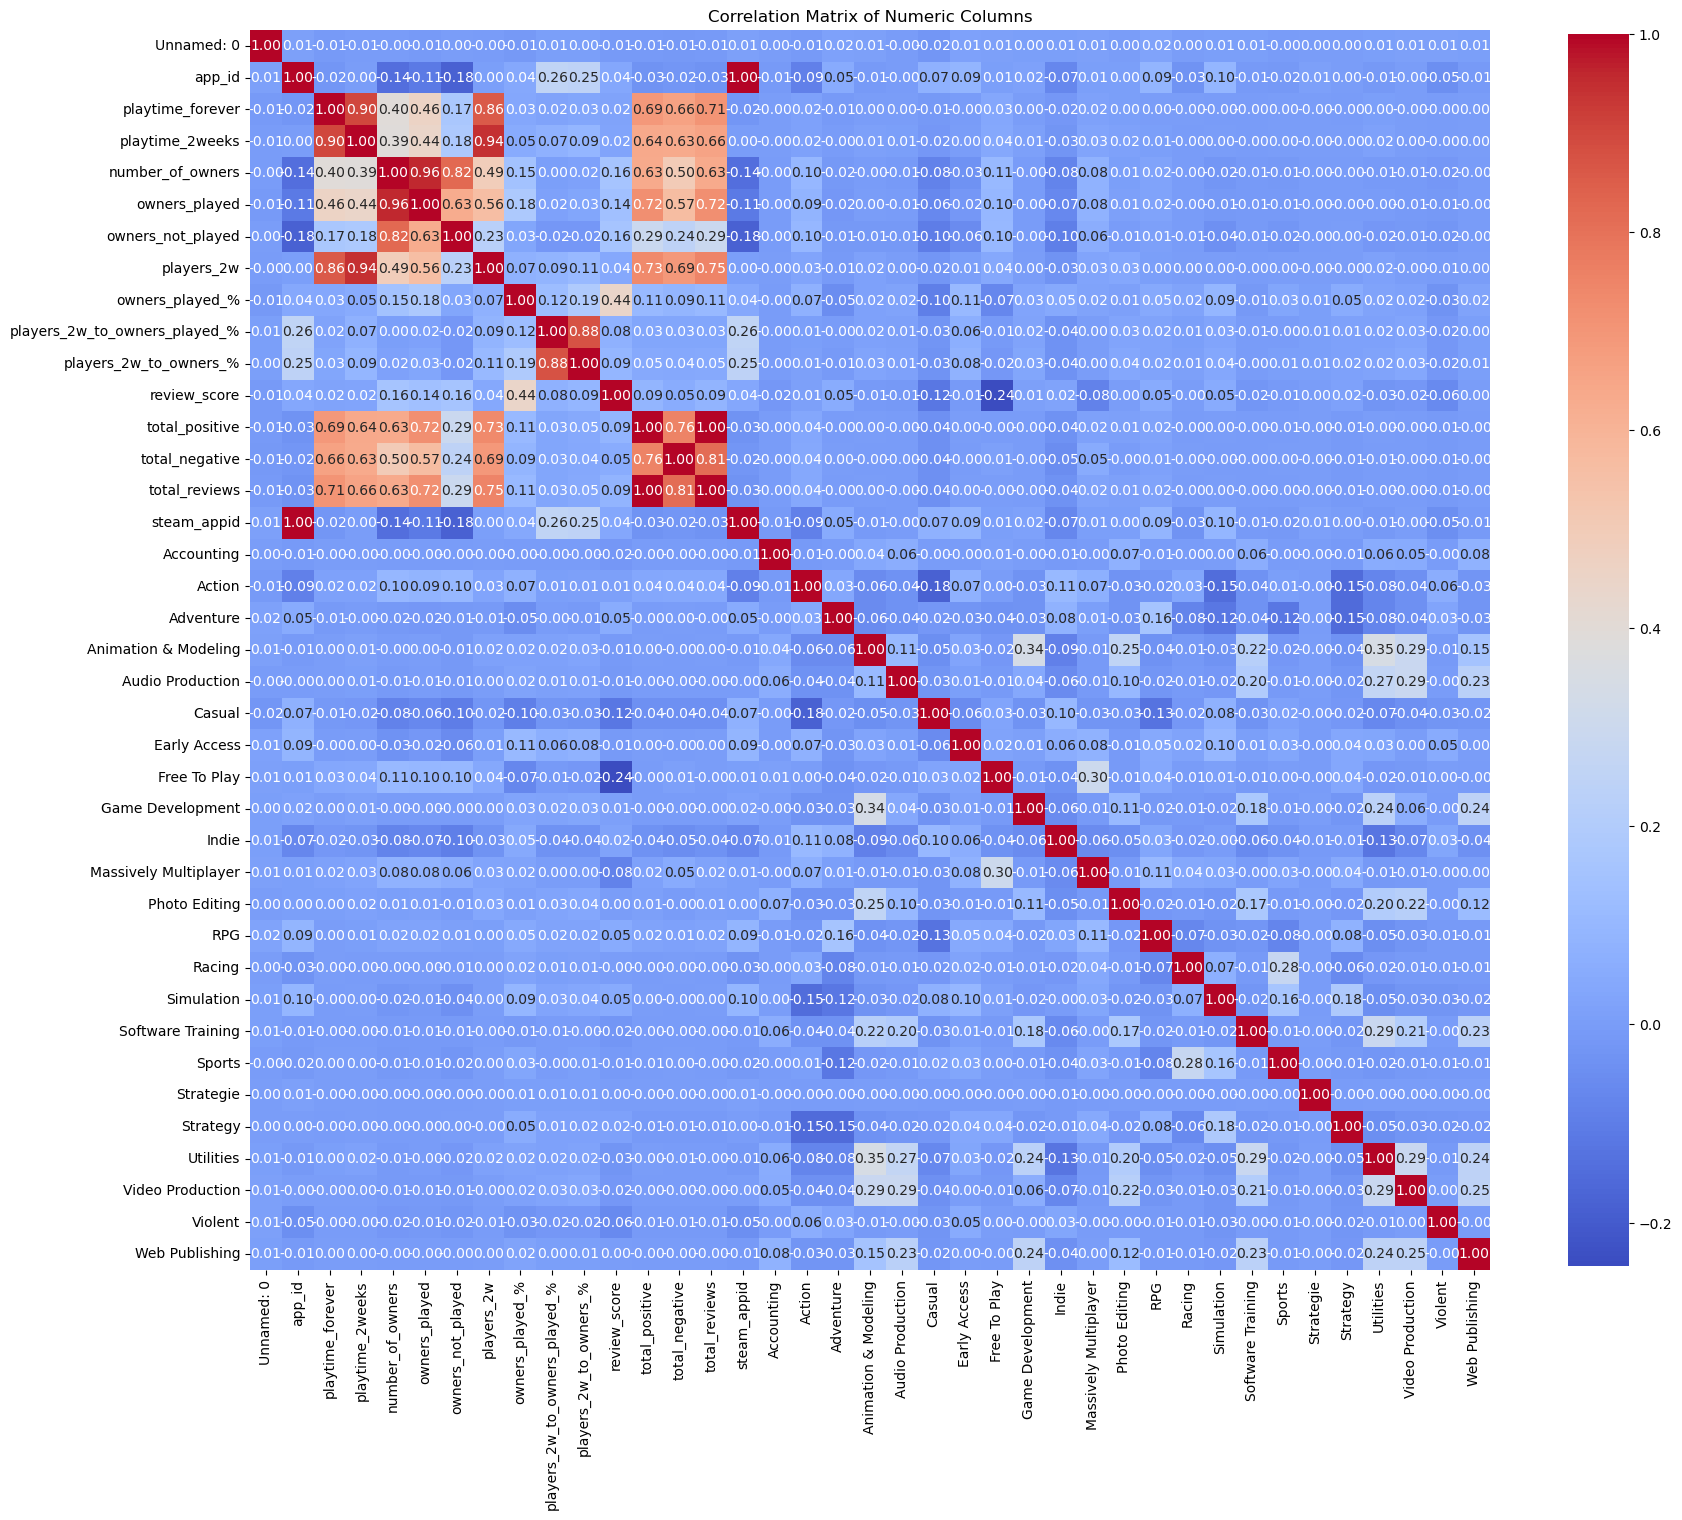

In [360]:

# Assuming reg_3_t14 is your DataFrame
# reg_3_t14 = pd.read_csv('your_data.csv')  # Example of loading your DataFrame

# Step 1: Select only numeric columns
numeric_df = reg_2.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix
correlation_matrix = numeric_df.corr()
# Step 3: Display the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Columns')
plt.savefig('correlation_matrix.png', bbox_inches='tight', dpi=300)
plt.show()


regression columns

un_rev = review_score

twitch_365/14 = pick one from : watch_time, stream_time, streamers, average_viewers, average_channels. 
    But you can also pick average viewer ratio for free maybe : peak_viewers, peak_channels,

directory_2 = get rid of tutorial, sexual content, nudity, 360_video, Documentary, Gore, Movie, Short, episodic, education, design & illustration, animation and modeling, initial,

 
    

In [366]:
reg_3_t365.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1568 non-null   int64  
 1   name                           1568 non-null   object 
 2   app_id                         1568 non-null   int64  
 3   playtime_forever               1568 non-null   int64  
 4   playtime_2weeks                1568 non-null   float64
 5   number_of_owners               1568 non-null   int64  
 6   owners_played                  1568 non-null   int64  
 7   owners_not_played              1568 non-null   int64  
 8   players_2w                     1568 non-null   int64  
 9   owners_played_%                1568 non-null   float64
 10  players_2w_to_owners_played_%  1568 non-null   float64
 11  players_2w_to_owners_%         1568 non-null   float64
 12  review_score                   1568 non-null   i

In [382]:
lr = LinearRegression()

In [390]:
#lists - 

reg_2_X = reg_2[['review_score', 'Accounting', 'Action', 'Adventure', 'Animation & Modeling', 'Audio Production',
    'Casual', 'Early Access', 'Free To Play', 'Game Development', 'Indie',
    'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
    'Software Training', 'Sports', 'Strategie', 'Strategy', 'Utilities',
    'Video Production', 'Violent', 'Web Publishing' ]]

y1 = reg_2['playtime_forever']
y2 = reg_2['playtime_2weeks']
y3 = reg_2['number_of_owners']
y4 = reg_2['owners_played']
y5 = reg_2['owners_not_played']
y6 = reg_2['players_2w']
y7 = reg_2['owners_played_%']
y8 = reg_2['players_2w_to_owners_played_%']
y9 = reg_2['players_2w_to_owners_%']



In [388]:
reg_3_t14_X = reg_3_t14[['review_score', 'Action', 'Adventure',
    'Casual', 'Early Access', 'Free To Play', 'Indie',
    'Massively Multiplayer', 'RPG', 'Racing', 'Simulation', 'Sports', 'Strategy',
    'Violent', 'Watch time (mins)', 'Peak viewers', 'Peak channels', 'Average viewer ratio' ]]

y1_2 =  reg_3_t14['playtime_forever']
y2_2 =  reg_3_t14['playtime_2weeks']
y3_2 =  reg_3_t14['number_of_owners']
y4_2 =  reg_3_t14['owners_played']
y5_2 =  reg_3_t14['owners_not_played']
y6_2 =  reg_3_t14['players_2w']
y7_2 =  reg_3_t14['owners_played_%']
y8_2 =  reg_3_t14['players_2w_to_owners_played_%']
y9_2 =  reg_3_t14['players_2w_to_owners_%']



In [631]:
lr.fit(reg_3_t14_X, y2_2)

LinearRegression()

In [633]:
lr.intercept_

-55574.31775025909

In [635]:
lr.coef_

array([ 5.64636690e+03,  6.97514821e+03, -3.29163134e+03, -4.00550632e+03,
       -1.46087127e+04,  3.17202730e+04, -2.59745620e+03, -1.43485368e+04,
        6.43570064e+03,  4.45744031e+03,  4.01039767e+03,  1.08104936e+04,
        2.26056895e+04,  3.11994400e+04,  4.80458585e-03,  9.58035367e+00,
       -1.68571482e+02, -2.72446204e+01])

In [637]:
predictions = lr.predict(reg_3_t14_X)

In [639]:
predictions

array([3582655.01757754,   26990.49699329,  516186.87553457, ...,
        -52029.72663016,  -62624.59378381,  -43425.67632103])

In [641]:
reg_3_t14['predicted_playtime_2weeks'] = predictions

In [643]:
reg_3_t14[['predicted_playtime_2weeks','playtime_2weeks']]

,predicted_playtime_2weeks,playtime_2weeks
0,3.582655e+06,9857187.0
1,2.699050e+04,595447.0
2,5.161869e+05,807544.0
3,9.684424e+05,1302093.0
4,3.263640e+05,603987.0
...,...,...
1601,-1.198481e+04,0.0
1602,-4.835547e+04,0.0
1603,-5.202973e+04,0.0
1604,-6.262459e+04,0.0


In [645]:
errors = reg_3_t14['predicted_playtime_2weeks'] - reg_3_t14['playtime_2weeks']

In [647]:
np.mean(np.abs(errors)) # mean absolute error

51035.6063248744

In [649]:
r2_score(reg_3_t14['playtime_2weeks'], reg_3_t14['predicted_playtime_2weeks'])

0.4159489496143084

In [651]:
reg_3_t365_X = reg_3_t365[['review_score', 'Action', 'Adventure',
    'Casual', 'Early Access', 'Free To Play', 'Indie',
    'Massively Multiplayer', 'RPG', 'Racing', 'Simulation', 'Sports', 'Strategy',
    'Violent', 'Watch time (mins)', 'Peak viewers', 'Peak channels', 'Average viewer ratio']]

y1_3 = reg_3_t365['playtime_forever']
y2_3 = reg_3_t365['playtime_2weeks']
y3_3 = reg_3_t365['number_of_owners']
y4_3 = reg_3_t365['owners_played']
y5_3 = reg_3_t365['owners_not_played']
y6_3 = reg_3_t365['players_2w']
y7_3 = reg_3_t365['owners_played_%']
y8_3= reg_3_t365['players_2w_to_owners_played_%']
y9_3 = reg_3_t365['players_2w_to_owners_%']

lr.fit(reg_3_t365_X, y4_3)

lr.intercept_

lr.coef_

predictions = lr.predict(reg_3_t365_X)

predictions

reg_3_t365['predicted_owners_played'] = predictions

reg_3_t365[['predicted_owners_played','owners_played']]

errors = reg_3_t365['predicted_owners_played'] - reg_3_t365['owners_played']

np.mean(np.abs(errors)) # mean absolute error

r2_score(reg_3_t365['owners_played'], reg_3_t365['predicted_owners_played'])

0.24344144329967554

In [655]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def run_regression(df, x_columns, y_columns):
    results = []

    # Initialize the linear regression model
    lr = LinearRegression()

    # Loop through each y variable
    for y_col in y_columns:
        y = df[y_col]
        
        # Fit the model
        lr.fit(df[x_columns], y)

        # Make predictions
        predictions = lr.predict(df[x_columns])

        # Calculate R² score
        r2 = r2_score(y, predictions)

        # Store results
        results.append({
            'y_variable': y_col,
            'r2_score': r2,
            'intercept': lr.intercept_,
            'coefficients': lr.coef_
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    return results_df

# reg_3_t365_results - twitch 365 days, review, and genre

In [686]:
# Define your X and Y columns
x_columns = ['review_score', 'Action', 'Adventure', 
                          'Casual', 'Early Access', 'Free To Play', 
                          'Indie', 'Massively Multiplayer', 'RPG', 
                          'Racing', 'Simulation', 'Sports', 
                          'Strategy', 'Violent', 'Watch time (mins)', 
                          'Peak viewers', 'Peak channels', 
                          'Average viewer ratio']

y_columns = ['playtime_forever', 'playtime_2weeks', 'number_of_owners', 
             'owners_played', 'owners_not_played', 'players_2w', 
             'owners_played_%', 'players_2w_to_owners_played_%', 
             'players_2w_to_owners_%']

# Run the regression and get results
reg_3_t365_results = run_regression(reg_3_t365, x_columns, y_columns)

# Display the results
reg_3_t365_results

,y_variable,r2_score,intercept,coefficients
0,playtime_forever,0.201055,-1.396554e+07,"[2023952.3083003107, 2528761.4504776956, -2321..."
1,playtime_2weeks,0.265565,-3.894451e+03,"[1215.8290566809644, 6179.850161633598, -4176...."
2,number_of_owners,0.258974,-1.945878e+03,"[515.5965436477353, 1182.2555237781687, -758.5..."
3,owners_played,0.243441,-1.709233e+03,"[392.450881909005, 839.1876136955119, -614.132..."
4,owners_not_played,0.226515,-2.464837e+02,"[125.38537138713006, 347.9956359585946, -147.2..."
5,players_2w,0.294550,-3.470171e+00,"[3.8671466183810534, 17.249588215931556, -21.7..."
6,owners_played_%,0.165286,4.958155e+01,"[1.5374929313101768, 2.7107000217236, -4.71193..."
7,players_2w_to_owners_played_%,0.056146,8.924205e+00,"[-0.5521251887161939, -0.8424514311153429, -0...."
8,players_2w_to_owners_%,0.074973,5.727114e+00,"[-0.3445596085528308, -0.49424278803174443, -0..."


In [688]:
reg_3_t365_results.to_csv('reg_3_rg_t365.csv', index = False)

# reg_3_t14_results - twitch 14 days, review, and genre

In [664]:
# Define your X and Y columns
x_columns = ['review_score', 'Action', 'Adventure',
    'Casual', 'Early Access', 'Free To Play', 'Indie',
    'Massively Multiplayer', 'RPG', 'Racing', 'Simulation', 'Sports', 'Strategy',
    'Violent', 'Watch time (mins)', 'Peak viewers', 'Peak channels', 'Average viewer ratio']

y_columns = ['playtime_forever', 'playtime_2weeks', 'number_of_owners', 
             'owners_played', 'owners_not_played', 'players_2w', 
             'owners_played_%', 'players_2w_to_owners_played_%', 
             'players_2w_to_owners_%']

# Run the regression and get results
reg_3_t14_results = run_regression(reg_3_t14, x_columns, y_columns)

reg_3_t14_results

,y_variable,r2_score,intercept,coefficients
0,playtime_forever,0.319715,-2.972971e+07,"[3354188.6837254395, 2653618.377475311, -26258..."
1,playtime_2weeks,0.415949,-5.557432e+04,"[5646.3669041561425, 6975.1482065376085, -3291..."
2,number_of_owners,0.260529,-1.268300e+03,"[402.32147753650247, 1316.3705494207625, -733...."
3,owners_played,0.255878,-1.300421e+03,"[318.125724413815, 948.8129864743618, -590.835..."
4,owners_not_played,0.209854,2.437436e+01,"[86.00509947867648, 373.1236231497947, -145.62..."
5,players_2w,0.437815,-5.943663e+01,"[8.354278414955523, 20.200848267513024, -19.90..."
6,owners_played_%,0.213195,3.765878e+01,"[2.70571980629426, 5.262811590371411, -5.88092..."
7,players_2w_to_owners_played_%,0.117331,7.752569e+00,"[-0.3383592742128466, 0.026709576479394453, -0..."
8,players_2w_to_owners_%,0.135446,4.483139e+00,"[-0.11519907524398289, 0.14281259447871653, -0..."


In [682]:
reg_3_t14_results.to_csv('reg_3_rg_t14.csv', index = False)

In [676]:
# Define your X and Y columns
x_columns = ['review_score', 'Accounting', 'Action', 'Adventure', 'Animation & Modeling', 'Audio Production',
    'Casual', 'Early Access', 'Free To Play', 'Game Development', 'Indie',
    'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
    'Software Training', 'Sports', 'Strategie', 'Strategy', 'Utilities',
    'Video Production', 'Violent', 'Web Publishing']

y_columns = ['playtime_forever', 'playtime_2weeks', 'number_of_owners', 
             'owners_played', 'owners_not_played', 'players_2w', 
             'owners_played_%', 'players_2w_to_owners_played_%', 
             'players_2w_to_owners_%']

# Run the regression and get results
reg_2_results = run_regression_inf(reg_2, x_columns, y_columns)

reg_2_results

,y_variable,r2_score,intercept,coefficients
0,playtime_forever,0.003003,-192984.698793,"[216160.3207233705, -976077.4119705788, 694122..."
1,playtime_2weeks,0.005173,-443.362919,"[742.7997861341773, -8449.525280759419, 2598.5..."
2,number_of_owners,0.071632,54.912159,"[73.59872697404634, -57.629233217870606, 238.9..."
3,owners_played,0.054331,-19.884768,"[48.06497888294443, -65.51002615061627, 156.57..."
4,owners_not_played,0.075179,75.121953,"[25.821185108845633, 7.349598490027601, 83.163..."
5,players_2w,0.008218,-0.867489,"[1.2626018262441547, -15.773923402527938, 4.33..."
6,owners_played_%,0.229244,16.627179,"[3.9360275281171138, 9.701235167668449, 3.9648..."
7,players_2w_to_owners_played_%,0.014756,0.755334,"[0.19598250598466327, -1.8508084525474988, 0.1..."
8,players_2w_to_owners_%,0.021030,0.199085,"[0.15193620767907867, -1.3411870173883007, 0.1..."


In [680]:
reg_2_results.to_csv('reg_2_rev_&_genre.csv', index = False)

In [672]:
def run_regression_inf(df, x_columns, y_columns):
    results = []

    # Initialize the linear regression model
    lr = LinearRegression()

    # Loop through each y variable
    for y_col in y_columns:
        y = df[y_col].dropna()  # Drop NaN values for the target variable
        
        # Filter out infinite and very large values
        y = y[np.isfinite(y) & (y.abs() < 1e10)]  # Adjust the threshold as needed
        X = df[x_columns].loc[y.index]  # Align X with non-null y values

        if X.empty or y.empty:
            print(f"No valid data for {y_col}, skipping.")
            continue

        # Fit the model
        lr.fit(X, y)

        # Make predictions
        predictions = lr.predict(X)

        # Calculate R² score
        r2 = r2_score(y, predictions)

        # Store results
        results.append({
            'y_variable': y_col,
            'r2_score': r2,
            'intercept': lr.intercept_,
            'coefficients': lr.coef_
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    return results_df